In [209]:
import pandas as pd

In [210]:
import numpy as np

In [211]:
from helper import *

In [212]:
path='/home/rachel/Galvanize/capston1/data/'

df dataframeis the first 1000 rows of the dataset

In [213]:
df = pd.read_json(path+'COAL.json', orient = 'index').iloc[:1000,:]

In [214]:
type(df)

pandas.core.frame.DataFrame

useful data (quarterly/annual ash content) is nested in a dictionary inside the data column of each row.

The functions from the helper.py, used below, expands the coal df to include all the possible keys in the data dictionaries , and fills rows with the corresponding values from the dictionary.

In [215]:
all_keys = all_keys(df)  # all possible yea values (years)
data_df = data_to_df(all_keys,df) # creates a data_df filled with zeros with cols=allkeys.
new_df = concat_to_df(df,data_df)  # concats the data_df to the main df
fill_data_vals(new_df) # uses the dictionary for each row to fill te new columns

In [216]:
new_df.iloc[:,-86:]

,2003Q2,2002Q2,2013Q3,2002,2008Q2,2012Q3,2013Q2,2016,2011,2002Q3,...,2014,2012Q1,2003,2014Q1,2014Q4,2003Q1,2016Q1,2003Q4,2009Q4,2007Q1
0,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,7.53,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
1,0.00,0.00,13.327886,0.0,16.174050,12.518092,11.335796,0.00,0.00,0.0,...,0.00,13.459852,0.0,13.742132,13.237455,0.00,12.910289,0.00,15.155350,0.00
2,0.00,0.00,4.841968,0.0,5.216381,4.984614,4.828248,0.00,0.00,0.0,...,0.00,4.901699,0.0,4.856574,4.880440,0.00,4.730833,0.00,5.222586,0.00
3,6.93,8.87,8.220000,0.0,9.050000,NaN,8.480000,0.00,0.00,7.4,...,0.00,NaN,0.0,7.940000,7.580000,7.73,0.000000,8.68,NaN,9.88
4,0.00,0.00,7.721398,0.0,6.174875,7.769639,8.089866,0.00,0.00,0.0,...,0.00,7.724420,0.0,7.758537,7.683500,0.00,0.000000,0.00,7.134017,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.00,447.000000,0.00,0.000000,0.00
996,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,73.03,181.45,0.0,...,118.48,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
997,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
998,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,182.78,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00


the f column informs you if the row records anually or quarterly

In [217]:
new_df["f"].head()

0    A
1    Q
2    Q
3    Q
4    Q
Name: f, dtype: object

some inputs for geography are groups of states. like mountain region which consists of "USA-AZ+USA-CO+USA-ID+USA-MT+USA-NM+USA-NV+USA-UT+USA-WY"

In [218]:
# used to check how many rows per state there where
len(new_df.loc[new_df['geography']=='USA-AL'])

0

I have noticed that when ash content reporting come from a region the iso3166 colum is nan. so below i am makeing a subset df of just coal ash reporting by state with only useful columns [name,f, description, iso3166, and the last 86 columns which are the data]


In [219]:

coal_ash_df = new_df[new_df['name'].str.match('Ash content')]
coal_ash_df.shape
coal_ash_df.head(3)

,name,units,f,description,copyright,source,iso3166,geography,start,end,...,2014,2012Q1,2003,2014Q1,2014Q4,2003Q1,2016Q1,2003Q4,2009Q4,2007Q1
0,Ash content : Ohio : electric utility cogen : ...,percent,A,Power plants owned by regualted electric utili...,None,"EIA, U.S. Energy Information Administration",USA-OH,USA-OH,2009,2016,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,Ash content : Mississippi : electric utility n...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2008Q1,2017Q1,...,0.0,13.459852,0.0,13.742132,13.237455,0.0,12.910289,0.0,15.155350,0.0
2,Ash content : Missouri : electric power (total...,percent,Q,Power plants owned by companies whose primary ...,None,"EIA, U.S. Energy Information Administration",USA-MO,USA-MO,2008Q1,2017Q1,...,0.0,4.901699,0.0,4.856574,4.880440,0.0,4.730833,0.0,5.222586,0.0


In [220]:
# filtering out anual data
coal_ash_df = coal_ash_df[coal_ash_df['f']=='A']
#coal_ash_df.shape

In [221]:
coal_ash_df.iloc[:,-86:]

,2003Q2,2002Q2,2013Q3,2002,2008Q2,2012Q3,2013Q2,2016,2011,2002Q3,...,2014,2012Q1,2003,2014Q1,2014Q4,2003Q1,2016Q1,2003Q4,2009Q4,2007Q1
0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,7.53,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,6.32,0.0,0.0,0.0,8.48,6.26,0.0,...,6.87,0.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7.94,9.18,0.0,...,8.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7.94,8.51,0.0,...,8.13,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7.87,7.08,0.0,...,7.77,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9.00,9.58,0.0,...,9.21,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.00,0.0,0.0,0.0,8.50,NaN,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9.96,9.56,0.0,...,9.69,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.00,0.0,0.0,0.0,13.69,13.85,0.0,...,13.55,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,8.73,0.0,0.0,0.0,7.13,6.71,0.0,...,7.02,0.0,6.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0


62 rows that report quarterly. 58 rows report quarterly

In [222]:
# filtering out states from region reports
coal_ash_df.dropna(subset=['iso3166'],inplace=True)
coal_ash_df.shape

(46, 106)

In [223]:
# just name and state
coal_ash_df_1= coal_ash_df.filter(items=['name','iso3166'])
coal_ash_df_1.shape

(46, 2)

In [224]:
#just year columns
coal_ash_df_2 = coal_ash_df.iloc[:,-86:]
coal_ash_df_2.shape

(46, 86)

In [225]:
# concatinating the two sets of columns to get only useful info
ash_anual_state_df = coal_ash_df_1.join(coal_ash_df_2)
ash_anual_state_df.shape

(46, 88)

In [226]:
# filtering for just anual data
anual_cols = [c for c in ash_anual_state_df.columns if not 'Q' in c]

ash_anual_state_df = ash_anual_state_df[sorted(anual_cols)]


**ash_anual_state_df is a datframe of ash content per state per year**

In [227]:
ash_anual_state_df#.iloc[:,:17]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,iso3166,name
0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.70,6.60,7.53,0.00,0.00,0.00,0.00,0.00,USA-OH,Ash content : Ohio : electric utility cogen : ...
12,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.77,7.41,6.97,7.08,7.67,7.66,7.77,7.39,7.87,USA-NH,Ash content : New Hampshire : electric utility...
14,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.40,9.51,9.30,9.58,9.26,9.11,9.21,9.21,9.00,USA-OH,Ash content : Ohio : electric power (total) : ...
17,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,7.87,8.44,9.69,NaN,NaN,0.00,0.00,6.92,8.50,USA-MT,Ash content : Montana : commercial and institu...
19,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.90,9.69,9.58,9.56,8.89,8.85,9.69,10.05,9.96,USA-MT,Ash content : Montana : independent power prod...
20,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,15.92,15.24,14.27,13.85,12.49,12.65,13.55,13.55,13.69,USA-MS,Ash content : Mississippi : independent power ...
24,0.0,0.0,8.73,6.08,6.18,6.81,6.42,6.47,6.70,6.44,6.60,6.71,6.86,6.47,7.02,7.14,7.13,USA-OH,Ash content : Ohio : coke plants : annual
26,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,7.38,7.13,6.89,7.05,7.93,8.63,9.50,9.38,9.14,USA-OH,Ash content : Ohio : independent power produce...
27,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.10,9.40,10.10,9.80,9.30,9.20,9.70,9.40,0.00,USA-MT,Ash content : Montana : electric utility : annual
29,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.90,9.69,9.58,9.56,8.89,8.85,9.69,10.05,9.96,USA-MT,Ash content : Montana : electric utility non-c...


In [228]:
# histogram of north carolina ash content row
NC_ash = ash_anual_state_df[ash_anual_state_df['iso3166']=='USA-NC']
NC_ash

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,iso3166,name
64,0.0,0.0,7.22,7.12,7.33,8.02,7.63,7.54,7.65,7.17,7.47,7.52,7.35,7.92,7.61,6.81,7.23,USA-NC,Ash content : North Carolina : other industria...
66,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.23,6.04,6.42,0.00,USA-NC,Ash content : North Carolina : electric utilit...
68,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,7.88,10.68,9.88,9.38,7.82,8.55,9.10,9.90,0.00,USA-NC,Ash content : North Carolina : electric utilit...
77,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,8.49,8.28,8.26,8.27,8.52,8.78,8.07,8.36,8.87,USA-NC,Ash content : North Carolina : commercial and ...
87,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,11.59,10.96,11.21,11.41,10.69,9.91,9.60,9.98,9.82,USA-NC,Ash content : North Carolina : electric power ...


In [229]:
NC_ash.shape


(5, 19)

Text(0.5, 0, 'percentage')

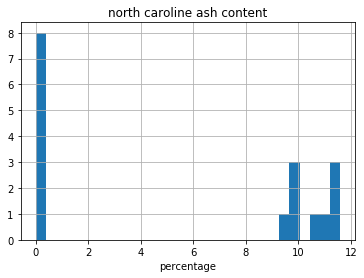

In [231]:
# just getting ash content for total electric power plants
import matplotlib.pyplot as plt
NC_ash_electric = NC_ash[NC_ash['name'].str.match('Ash content : North Carolina : electric power')]
#NC_ash_electric = NC_ash.iloc[87]
type(NC_ash_electric)
NC_ash_electric.iloc[:,:17].T.hist(bins=30)
plt.title("north caroline ash content")
plt.xlabel("percentage")


**This shows me there was no ash content reported for most years...**

 maye we can look at some scatter plots ....

In [300]:
total_ash = ash_anual_state_df.groupby(['iso3166']).mean().T
total_ash#.reset_index()


iso3166,USA-MO,USA-MS,USA-MT,USA-NC,USA-ND,USA-NE,USA-NH,USA-NJ,USA-NM,USA-NV,USA-NY,USA-OH,USA-OK,USA-OR,USA-PA
2000,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.000000,0.00,0.00,0.000,0.000,0.000000,0.000000,0.000000
2001,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.000000,0.00,0.00,0.000,0.000,0.000000,0.000000,0.000000
2002,0.00,0.00,0.000,1.444,0.000,0.00,0.00,0.000000,0.00,0.00,1.038,1.746,1.913333,2.163333,2.601429
2003,0.00,0.00,0.000,1.424,0.000,0.00,0.00,0.000000,0.00,0.00,1.076,1.216,1.886667,2.583333,2.698571
2004,0.00,0.00,0.000,1.466,0.000,0.00,0.00,0.000000,0.00,0.00,1.298,1.236,2.130000,2.430000,2.855714
2005,0.00,0.00,0.000,1.604,0.000,0.00,0.00,0.000000,0.00,0.00,1.270,1.362,2.170000,0.000000,2.878571
2006,0.00,0.00,0.000,1.526,0.000,0.00,0.00,0.000000,0.00,0.00,1.176,1.284,2.233333,0.000000,2.731429
2007,0.00,0.00,0.000,1.508,0.000,0.00,0.00,0.000000,0.00,0.00,1.154,1.294,2.180000,0.000000,2.780000
2008,8.48,15.92,9.330,7.122,9.055,5.17,6.77,6.873333,21.96,5.72,7.752,6.740,8.543333,4.740000,15.565714
2009,8.51,15.24,9.380,7.418,9.370,5.18,7.41,6.466667,21.98,5.02,7.150,7.962,8.110000,4.830000,15.544286


In [301]:
total_ash.columns


Index(['USA-MO', 'USA-MS', 'USA-MT', 'USA-NC', 'USA-ND', 'USA-NE', 'USA-NH',
       'USA-NJ', 'USA-NM', 'USA-NV', 'USA-NY', 'USA-OH', 'USA-OK', 'USA-OR',
       'USA-PA'],
      dtype='object', name='iso3166')

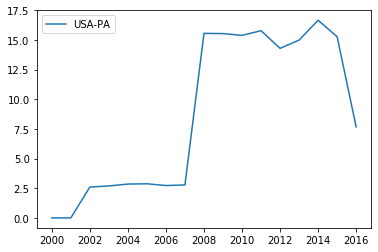

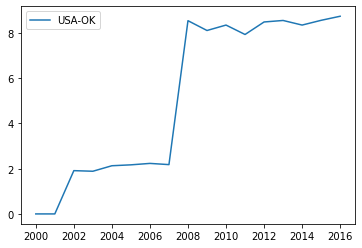

In [302]:

total_ash.plot(y='USA-PA')
total_ash.plot(y='USA-OK')

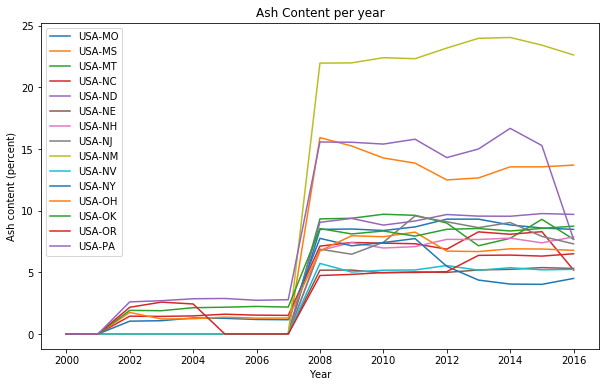

In [304]:
### lets try and get scatterplot to lay on top of each
x = np.arange(2000,2017)

fig, axs = plt.subplots()
fig.set_size_inches(10,6)
for col in total_ash.columns:
    axs.plot(x,total_ash[col], label=col)
axs.legend()
axs.set_title('Ash Content per year')
axs.set_xlabel('Year')
axs.set_ylabel('Ash content (percent)');



**WHat happend in 2008??:**
 - obama clean are act
 - giant coal ash spill in tennesee

In [122]:
#.## reading in TOTAL.json
total_df = json_read(path+'TOTAL.json')
total_df.shape

(1000, 7)

In [123]:
total_all_keys = all_keys(total_df)  # all possible yea values (years)
total_data_df = data_to_df(total_all_keys,total_df) # creates a data_df filled with zeros with cols=allkeys.
total_new_df = concat_to_df(total_df,total_data_df)  # concats the data_df to the main df
fill_data_vals(total_new_df)

In [124]:
total_new_df.shape

(1000, 609)

In [126]:
total_new_df.head(10)


,name,units,f,start,end,last_updated,data,2002,1980,198209,...,199912,197312,199305,200904,198806,200412,198906,200804,197810,197908
0,Distributed Solar Energy Consumption for Elect...,Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 11.944, '201703': 10.639, '201702':...",0,0,NA,...,0.023,NA,0.016,0.47,NA,0.054,0.011,0.353,NA,NA
1,Distributed Solar Photovoltaic Generation: Res...,Million Kilowatthours,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 1281.654, '201703': 1141.675, '2017...",0,0,NA,...,2.297,NA,1.562,48.117,NA,5.401,1.028,35.799,NA,NA
2,Solar Energy Consumed by the Residential Secto...,Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 17.584, '201703': 15.757, '201702':...",0,0,NA,...,4.009,NA,5.886,5.308,NA,3.396,5.102,5.184,NA,NA
3,"Utility-Scale Solar Energy Consumption: Total,...",Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 44.884, '201703': 41.698, '201702':...",0,0,NA,...,0.183,NA,0.51,0.97,0.014,0.078,0.226,0.928,NA,NA
4,Utility-Scale Solar Electricity Net Generation...,Million Kilowatthours,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 4816.383, '201703': 4474.468, '2017...",0,0,NA,...,17.944,NA,49.505,99.416,1.358,7.758,21.626,94.141,NA,NA
5,Distributed Solar Energy Consumption for Elect...,Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 21.134, '201703': 19.144, '201702':...",0,0,NA,...,0.064,NA,0.044,1.281,NA,0.148,0.029,0.962,NA,NA
6,Total Energy Consumed by the Transportation Se...,Trillion Btu,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 27925.283, '2015': 27355.195, '2014':...",26845.7,19696.7,0,...,0,0,0,0,0,0,0,0,0,0
7,Total Energy Consumed by the Transportation Se...,Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 2258.616, '201703': 2385.87, '20170...",0,0,1547.57,...,2352.31,1537.89,1926.23,2222.13,1884.92,2368.67,1912.68,2313.89,1737.71,1746.6
8,Total Energy Transportation Sector CO2 Emissio...,Million Metric Tons of Carbon Dioxide,A,1973,2016,2017-07-26T11:59:01-04:00,"{'2016': 1882.786, '2015': 1848.5, '2014': 182...",1892.47,1400.16,0,...,0,0,0,0,0,0,0,0,0,0
9,Total Energy Transportation Sector CO2 Emissio...,Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 152.472, '201703': 161.147, '201702...",0,0,109.834,...,165.739,108.505,136.784,153.11,133.33,166.3,135.315,160.287,123.353,124.07
